In [1]:
%load_ext Cython
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def culc_fdm(m):

    h=1/m
    x=[i*h for i in range(m)]

    x=np.array(x)
    b=np.sin(np.pi*x)*(h**2)*(np.pi)**2
    b[0]=0
    b[-1]=0

    diagonal_component=np.full(m,2)
    diagonal_component[0]=1
    diagonal_component[-1]=1

    diagonal_other=np.full(m-1,-1)
    diagonal_other[0]=0
    diagonal_other[-1]=0

    a=np.zeros((m,m))+np.diag(diagonal_component)+np.diag(diagonal_other,k=1)+np.diag(diagonal_other,k=-1) #係数行列

    return np.linalg.solve(a,b)


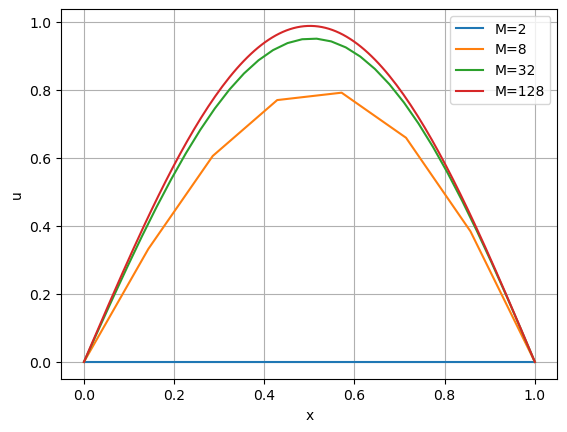

In [5]:
def plot_graph(m):
    x=np.linspace(0,1,m)
    u=culc_fdm(m)
    plt.plot(x,u,label="M={}".format(m))

for i in [2,8,32,128]:
    plot_graph(i)

plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("u")
plt.savefig("1SC22317Y06a02.pdf")
plt.show()